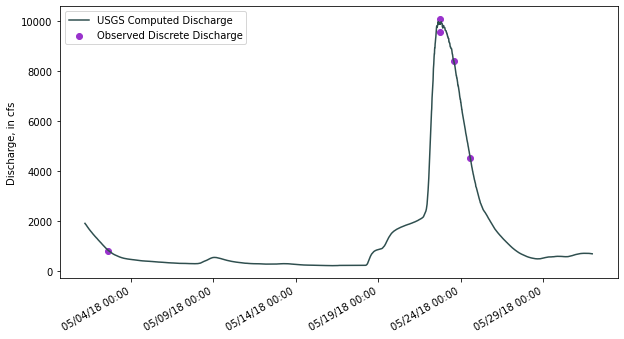

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

from dynrat.timeseries import read_nwis_rdb, \
    RatedDischargeTimeSeries


aq_q_csv_path = os.path.join('data', '02052090', 'site_02052090_iv_q_Aquarius.csv')
rated_q = RatedDischargeTimeSeries.from_aq_csv(aq_q_csv_path)

fm_rdb_path = os.path.join('data', '02052090', 'site_02052090_fm_NWIS.txt')
observed_h, observed_q = read_nwis_rdb(fm_rdb_path)

fig, ax = plt.subplots(figsize=(10, 5))

_ = rated_q.plot(ax)
_ = observed_q.plot(ax)

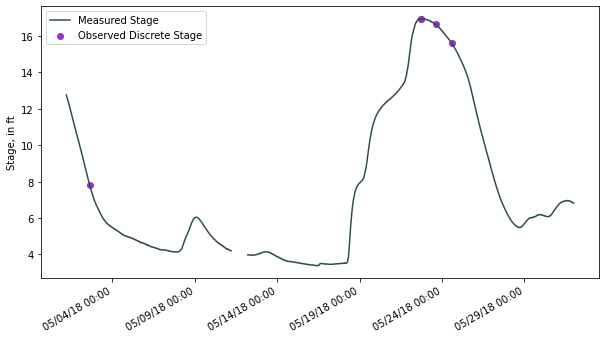

In [2]:
from dynrat.timeseries import MeasuredStageTimeSeries


aq_h_csv_path = os.path.join('data', '02052090', 'site_02052090_iv_s_Aquarius.csv')
aq_stage_ts = MeasuredStageTimeSeries.from_aq_csv(aq_h_csv_path)

fig, ax = plt.subplots(figsize=(10, 5))

_ = aq_stage_ts.plot(ax)
_ = observed_h.plot(ax)

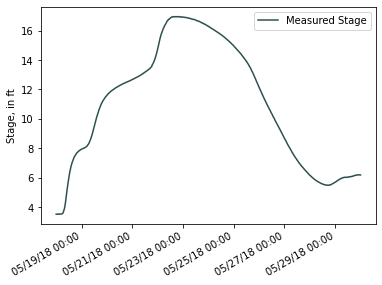

In [3]:
_ = aq_stage_ts.subset_dt('5/18/18', '5/30/18').plot()

In [4]:
aq_stage_ts.null_obs()

105

In [5]:
from dynrat.timeseries import parse_nwis_csv


nwis_csv_path = 'data/02052090/site_02052090_iv_q_s_NWIS.csv'

nwis_data = parse_nwis_csv(nwis_csv_path)
nwis_data.head()

,Stage,Discharge
DateTime,,
2018-05-01 00:00:00+00:00,13.17,2030.0
2018-05-01 00:15:00+00:00,13.16,2020.0
2018-05-01 00:30:00+00:00,13.15,2020.0
2018-05-01 00:45:00+00:00,13.13,2010.0
2018-05-01 01:00:00+00:00,13.12,2010.0


In [6]:
nwis_stage_ts = MeasuredStageTimeSeries(nwis_data['Stage'], freq=15*60)
nwis_stage_ts.data()

DateTime
2018-05-01 00:00:00+00:00    13.17
2018-05-01 00:15:00+00:00    13.16
2018-05-01 00:30:00+00:00    13.15
2018-05-01 00:45:00+00:00    13.13
2018-05-01 01:00:00+00:00    13.12
                             ...  
2018-05-31 22:45:00+00:00     6.85
2018-05-31 23:00:00+00:00     6.84
2018-05-31 23:15:00+00:00     6.83
2018-05-31 23:30:00+00:00     6.83
2018-05-31 23:45:00+00:00     6.82
Freq: 900S, Length: 2976, dtype: float64

In [7]:
from dynrat.timeseries import parse_nwis_csv


measured_h = aq_stage_ts.fill(nwis_stage_ts)
measured_h.null_obs()

0

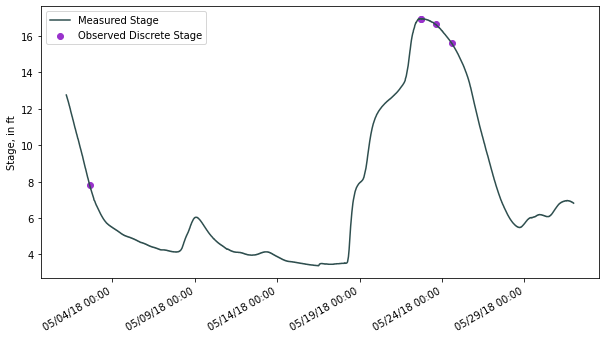

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = measured_h.plot(ax)
_ = observed_h.plot(ax)

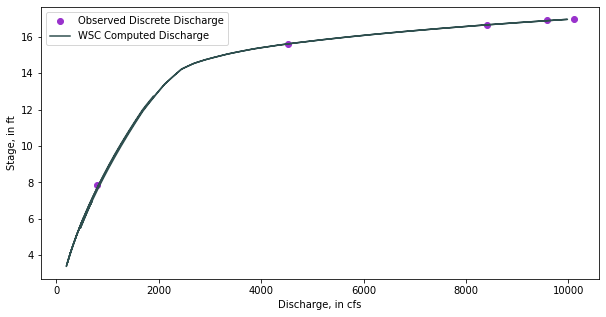

In [9]:
from dynrat.plot import stage_discharge_plot


fig, ax = plt.subplots(figsize=(10, 5))

_ = stage_discharge_plot(observed_h, observed_q, ax)
_ = stage_discharge_plot(measured_h, rated_q, ax)

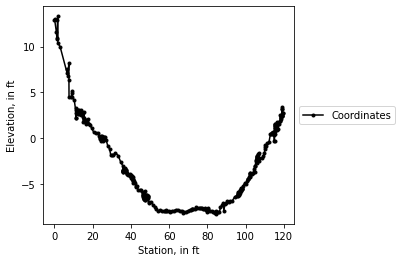

In [10]:
import numpy as np

from hydxscomp.crosssection import CrossSection
from dynrat.frict import TableFrict
from dynrat.sect import CrossSect


xs_csv_path = os.path.join('data', '02052090', 'site_02052090_cs_20180522.csv')

station, elevation = np.loadtxt(xs_csv_path, delimiter=',', skiprows=1, unpack=True)

min_stage = elevation.min()
max_stage = elevation.max()
frict = TableFrict([min_stage, max_stage], [0.035, 0.035])

xs = CrossSection(station, elevation, frict)

sect = CrossSect(xs)

_ = xs.plot()

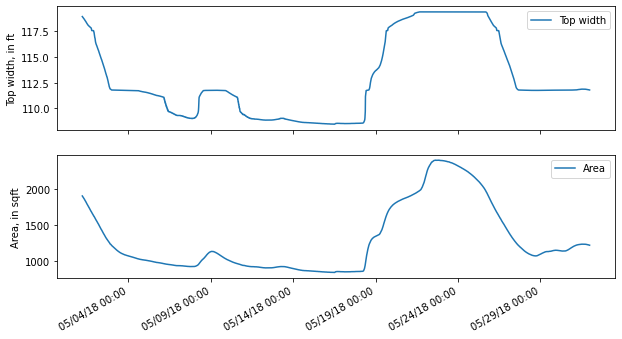

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

_ = measured_h.cross_section_plot(sect, 'top width', ax=ax1)
_ = ax1.set_ylabel('Top width, in ft')
_ = ax1.set_xlabel('')

_ = measured_h.cross_section_plot(sect, 'area', ax=ax2)
_ = ax2.set_ylabel('Area, in sqft')